## Assignment-08
### Data Analytics-I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('boston_housing.csv')

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Columns:

- **CRIM**: Crime rate per town
- **ZN**: Big residential land percentage
- **INDUS**: Business land percentage
- **CHAS**: 1 if near river, else 0
- **NOX**: Pollution level (Nitric Oxide)
- **RM**: Average rooms per house
- **AGE**: Old houses percentage
- **DIS**: Distance to workplaces
- **RAD**: Highway access level
- **TRATIO**: Student-teacher ratio
- **B**: Black population factor
- **LSTAT**: Poor people percentage
- **MEDV**: House price (in $1000s)


In [5]:
df.shape

(506, 14)

In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data visualisation of medv variable

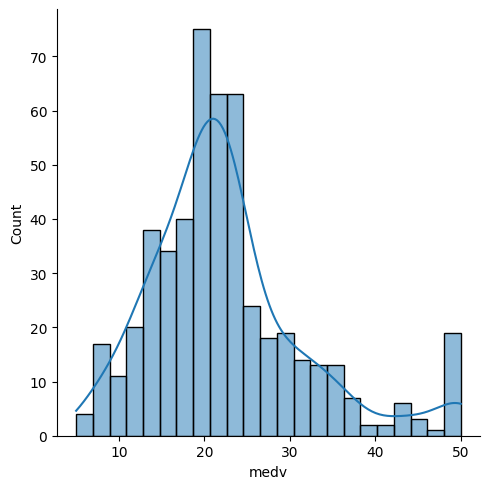

In [8]:
#Distribution of count of mdv i.e. medium value homes with KDE i.e kernal density estimate
sns.displot(df['medv'],kde=True)

### Correlation matrix to check the relation between various variables

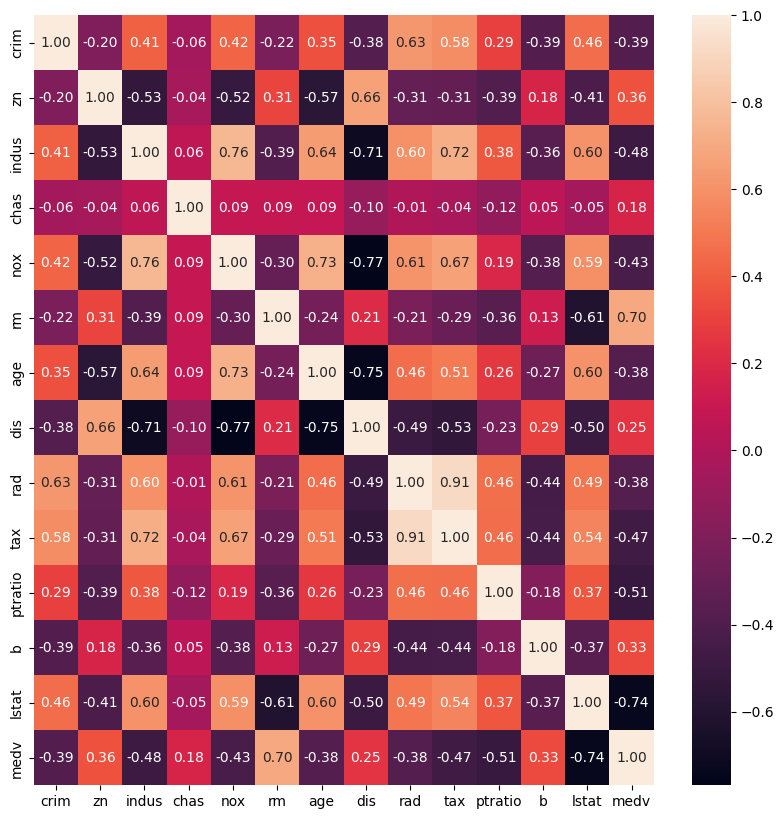

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f")
plt.show()

### medv↑ with rm↑ and medv↓ with lstat↑

### Model Training method: Linear Regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#Define (Independent variables or all input features) and Y(dependent variable or target or output variablr)
X = np.asarray(df.drop(["medv"], axis=1)) #drop the target variable from the dataset 
y = np.asarray(df["medv"])

# Split the data into training and testing sets 30:70
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create and train the Linear Regression model
model = LinearRegression()

#Scale the data using standard scaler between 0-1
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#TRain the model
model.fit(X_train, y_train)

#Make Predictions
y_pred = model.predict(X_test)
#y_pred is an array containing the predicted values for the target variable (house prices) based on the test data provided. The model predicts the
#price or medv based on the learned patterns
print(y_pred)

[22.28062386 17.5761257  20.66504264 17.28678092 24.42456798 24.93529705
 16.69185942 21.14664733 23.15982123 16.65811738 22.65871968 33.38784126
 20.17411278 36.83384742 31.11031456 17.16707749  9.01111308 21.11331768
 12.16845575 24.60604658 31.2815383  17.86411707 21.76886266 21.76985819
 32.14044137 27.59010249 20.87160197 29.56499053 14.1539579  32.28435639
 20.10751163 14.48915022 14.71704662 37.09276826 19.04931709 15.25005016
 18.45383059 26.20984381 18.59571123 23.10687821 19.63797725 13.51373532
 22.43846431 41.15147488 12.73949958 21.45155705 20.3525173  18.1453064
 17.91764903 21.01074333 23.78925491 27.4092343  21.44153817 25.21529273
 11.56341215 35.3511167  39.07554958 16.0939853  20.38305761 19.27673671
 31.77183459 22.38458465 20.40145224 35.31295041 26.70863801 10.44995032
 16.73596039  6.67981884 32.89706898 33.55307404  8.2311034  23.65181409
 18.80195825 17.52074478 14.68580262 23.26888211  8.17727038 20.86328165
 20.06285348 21.36570393 37.65317615 29.89233937 17.

### Model Evaluation: R-squared score, Mean Absolute error, Mean squared error,Root mean square error

Mean Absolute Error (MAE): 3.76
Mean Squared Error (MSE): 33.51
Root Mean Squared Error (RMSE): 5.79
R-squared (R²): 0.65


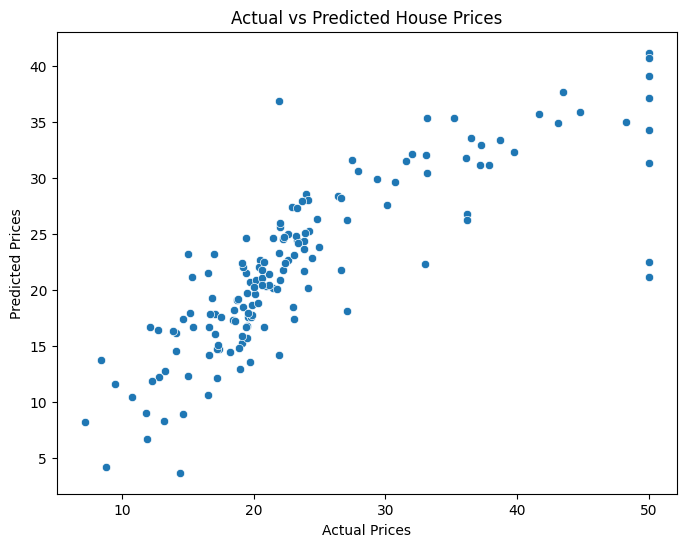

In [11]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualizing Predictions vs Actual Values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

### Model Training on selected features and perform Prediction and visualization

Mean Absolute Error (MAE): 3.35
Mean Squared Error (MSE): 27.80
Root Mean Squared Error (RMSE): 5.27
R-squared (R²): 0.62


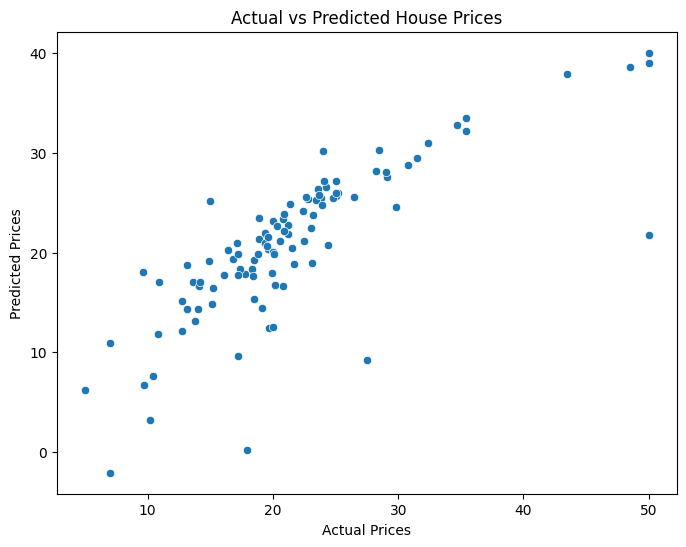

In [17]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Selecting relevant features
X = df[["rm", "lstat", "ptratio", "tax", "indus", "nox"]]
y = df["medv"]  # Target variable

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualizing Predictions vs Actual Values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
